## Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Merging all months data into single file and saving it

In [2]:
import os
all_files = os.listdir('./Sales_Data')

yearly_data = pd.DataFrame()

for file in all_files:
    df = pd.read_csv('./Sales_Data/'+ file)
    yearly_data = pd.concat([yearly_data,df])
    
yearly_data.to_csv('yearly_data.csv', index = False)

## Re reading the previously saved data again for easiness

In [3]:
yearly_data = pd.read_csv('yearly_data.csv')
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


## Cleaning the data

### Task:1 Drop NaN rows

In [4]:
nan_df = yearly_data[yearly_data.isna().any(axis =1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185230,NaN,NaN,NaN,NaN,NaN,NaN
185379,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN
185913,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
yearly_data = yearly_data.dropna(how = "all")  # how=all means if all values are Null, use any if one of the values is Null and you want to drop it

### Task 2:- Find 'or' and delete it, this we figured out when trying to convert str to int below while adding 'month' column

In [6]:
temp_df = yearly_data[yearly_data['Order Date'].str [0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183747,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185675,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185791,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
yearly_data = yearly_data[yearly_data['Order Date'].str [0:2] != 'Or']

### Task 3:- Convert numeric columns to correct data types ( they are in string currently )

In [8]:
yearly_data['Quantity Ordered'] = pd.to_numeric(yearly_data['Quantity Ordered'])
yearly_data['Price Each'] = pd.to_numeric(yearly_data['Price Each'])

## Augument data with additional columns

### 1. Adding a month column

In [9]:
yearly_data['Month'] = yearly_data['Order Date'].str [0:2] 
yearly_data['Month'] = yearly_data['Month'].astype('int32') # convert to int as well
yearly_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9


### 2. Adding a sales column

In [10]:
yearly_data['Sales'] = yearly_data['Quantity Ordered'] * yearly_data['Price Each']
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


### 3:-  Add a city column

In [11]:
def get_city(address):
    splitted = address.split(',')
    state = splitted[-1].split(' ') [1] # returns like CA, TX, WA
    return splitted [1] + ' ' + state

#### we couldve used only the city names but why are we also adding states name? It's because city name can be duplicated. For example there could be two 'Haldibari' cities belonging to two diff states/country/location. So adding the state behind it makes it distinguishable

In [12]:
yearly_data['City'] = yearly_data['Purchase Address'].apply(lambda x : get_city(x) )
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA


# Q.1 What was the best month for sales? How much was earned that month?

In [13]:
results = yearly_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [14]:
months = results.index  # this gives all the month as we can see above the 'Month' col acts as the index
months

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

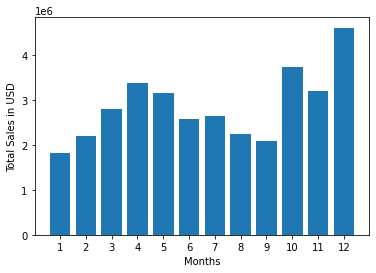

In [15]:
plt.bar(months,results['Sales'])
plt.xticks(months)  # this shows all the months, otherwise it was showing 2,4,6,8..,12
plt.xlabel('Months')
plt.ylabel('Total Sales in USD')
plt.show()

### Analysts can interpret various info from the above chart. For ex:- December is mostly holiday, you've got Christmas, New Year, so a lot of shoppings and stuffs, hence more sales

# Q.2 Which city has the highest sales?

In [16]:
results = yearly_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


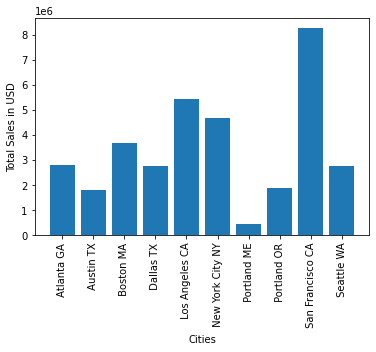

In [17]:
cities = results.index
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 10)  
plt.xlabel('Cities')
plt.ylabel('Total Sales in USD')
plt.show()


# Q.3  What time should we display ads to maximise the likelihood of customers buying products?

In [18]:
yearly_data['Order Date'] = pd.to_datetime(yearly_data['Order Date'])

In [19]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA


In [20]:
yearly_data['Hour'] = yearly_data['Order Date'].dt.hour
yearly_data['Minute'] = yearly_data['Order Date'].dt.minute

In [21]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA,14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin TX,10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA,17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA,7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA,19,3


In [22]:
result = yearly_data.groupby('Hour').count()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


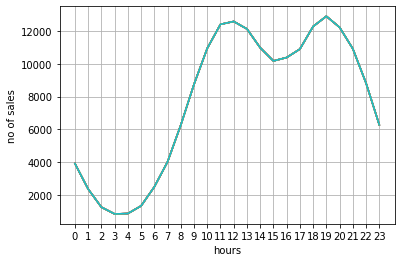

In [23]:
hours = result.index
plt.plot(hours, result)
plt.xticks(hours)
plt.xlabel("hours")
plt.ylabel("no of sales")
plt.grid()
plt.show()

### so it's basically arund 11 am-12 pm and at 7 pm (19) that most sales happen

# Q 4. What products are most often sold together?

### How'd we know which items are sold together? By using product ID. If the items have same product ID, that indicates they are bought together.

In [24]:
# duplicated helps to bring the duplicated items together, keep = False keeps all the duplicates
df =yearly_data[yearly_data['Order ID'].duplicated(keep=False) ]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City NY,15,6
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City NY,15,6
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco CA,10,33
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco CA,10,33
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles CA,12,48
71,248219,Google Phone,1,600.00,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600.00,Los Angeles CA,12,48
117,248265,Vareebadd Phone,1,400.00,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco CA,14,7
118,248265,Bose SoundSport Headphones,1,99.99,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,99.99,San Francisco CA,14,7
176,248323,Google Phone,1,600.00,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,600.00,Portland OR,20,36
177,248323,Bose SoundSport Headphones,1,99.99,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,99.99,Portland OR,20,36


In [25]:
df['Grouped'] = df.groupby('Order ID') ['Product'].transform(lambda x: ','.join(x))
df.head()

/tmp/ipykernel_55290/2323391119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID') ['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City NY,15,6,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City NY,15,6,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco CA,10,33,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco CA,10,33,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles CA,12,48,"Bose SoundSport Headphones,Google Phone"


In [26]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [27]:
from itertools import combinations
from collections import Counter
count = Counter()

In [28]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### You can clearly see which items are sold together the most. Based on this data, we can advertise effectively. 

# Q 5. What product was sold the most? What could be the reason?

In [29]:
result = yearly_data.groupby('Product')
result.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [30]:
quantity_ordered = result.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

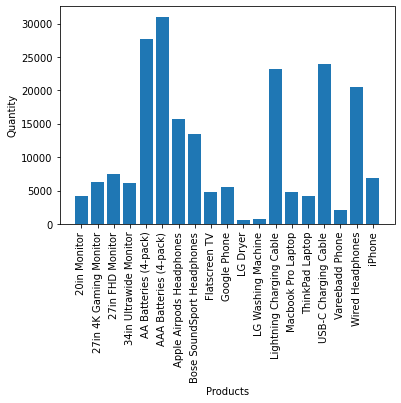

In [31]:
products = result.sum().index
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = 'vertical', size = 10)  
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

### Now, trying to gain more insight from the chart above, why's the AAA batteries ordered the most? Couldbe because the item is the cheapest among the items we have. So lets plot another graph.

In [32]:
prices = yearly_data.groupby('Product').mean() ['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/tmp/ipykernel_55290/4009739391.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical', size = 10)


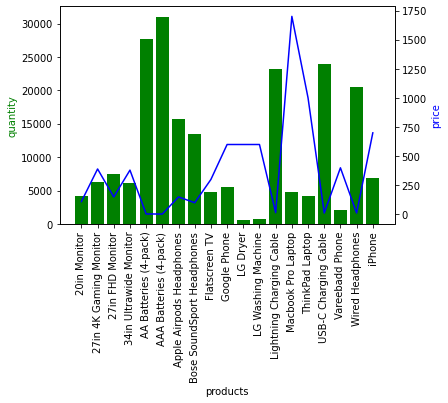

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color="g")
ax2.plot(products,prices, 'b')

ax1.set_xlabel('products')
ax1.set_ylabel('quantity', color = "g")
ax2.set_ylabel('price', color = "b")

ax1.set_xticklabels(products,rotation = 'vertical', size = 10)

plt.show()

### You can clearly see that the quantity is somehow inversely related to the price. However, there are some exceptions with items like macbook pro and iPhone which ig is pretty understandable given their demands are always high